# Wrangling and Analyzing Brazillian's Water Reservoirs Data

## Explanatory Analysis

This document is intended to see the trends of the water supply in Brazil looking at a 160 reservoirs' time series data.

As observed in the previous Exploratory Analysis, there are some missing years and Null values within the variables that need to be removed in order to make the data set tidy enough to build the line plots.

In [648]:
# Import all packages to be embedded on this Jupyter Notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime

%matplotlib inline

In [649]:
# Reading the csv file with the time series sata
reservoirs_df = pd.read_csv('reservoirs_time_series.csv')
reservoirs_df.head()

,reservoir_code,quota,affluence,turbocharged_flow,poured_flow,outflow,incremental_flow,natural_flow,useful_volume,measurement_date,year_of_date,month_of_date,day_of_date
0,19001,NaN,NaN,NaN,NaN,NaN,NaN,98.31,NaN,1932-06-01,1932,6,1
1,19001,NaN,NaN,NaN,NaN,NaN,NaN,99.67,NaN,1932-06-02,1932,6,2
2,19001,NaN,NaN,NaN,NaN,NaN,NaN,102.39,NaN,1932-06-03,1932,6,3
3,19001,NaN,NaN,NaN,NaN,NaN,NaN,105.09,NaN,1932-06-04,1932,6,4
4,19001,NaN,NaN,NaN,NaN,NaN,NaN,106.44,NaN,1932-06-05,1932,6,5


In [650]:
# Checking data types
reservoirs_df.dtypes

reservoir_code         int64
quota                float64
affluence            float64
turbocharged_flow    float64
poured_flow          float64
outflow              float64
incremental_flow     float64
natural_flow         float64
useful_volume        float64
measurement_date      object
year_of_date           int64
month_of_date          int64
day_of_date            int64
dtype: object

In [651]:
# Change the data types on some columns
reservoirs_df = reservoirs_df.astype({'measurement_date': 'datetime64[ns]', 
                                      'year_of_date': 'object', 'month_of_date': 'object', 'day_of_date': 'object'})

In [652]:
# Check data types
reservoirs_df.dtypes

reservoir_code                int64
quota                       float64
affluence                   float64
turbocharged_flow           float64
poured_flow                 float64
outflow                     float64
incremental_flow            float64
natural_flow                float64
useful_volume               float64
measurement_date     datetime64[ns]
year_of_date                 object
month_of_date                object
day_of_date                  object
dtype: object

In [653]:
# As we saw in the Part_1 of the project, there is gap of years between 1934 and 1978,
# and Filter the time series between 1992 and 2019 and between 1980 and 1990.
# Also prior to 1993, there are very few observations before 1993.
# So I filtered the dataframe to have only the time series from 1993 to 2018
reservoirs_df_2 = reservoirs_df.query('year_of_date > 1992 & year_of_date < 2019')

In [654]:
# We have about 9495 days between Jan 1st of 1993 and Dec 31th of 2018
reservoirs_df_2.measurement_date.max() - reservoirs_df_2.measurement_date.min()

Timedelta('9495 days 00:00:00')

In [655]:
# Create a dataframe (reservoir_row_count_df) to count the number of daily observations per reservoir_code
value_counts = reservoirs_df_2['reservoir_code'].value_counts(dropna=False, sort=True)
reservoir_row_count_df = value_counts.rename_axis('reservoir').reset_index(name='counts')
reservoir_row_count_df.head()

,reservoir,counts
0,19055,9502
1,19050,9500
2,19120,9500
3,19122,9499
4,19027,9499


In [656]:
# Now remove the reservoirs that have less than 9495 days of observation and store the reservoirs with full time series
# for the period inside the full_data_reserv list, the print the sorted list
full_data_reserv = list(reservoir_row_count_df.query('counts >= 9495').reservoir)
print(sorted(full_data_reserv))

[19001, 19002, 19004, 19005, 19006, 19007, 19008, 19009, 19010, 19011, 19012, 19013, 19014, 19015, 19016, 19017, 19018, 19019, 19020, 19021, 19022, 19024, 19025, 19026, 19027, 19028, 19029, 19031, 19032, 19033, 19034, 19035, 19036, 19037, 19038, 19039, 19040, 19041, 19042, 19043, 19044, 19045, 19046, 19047, 19048, 19049, 19050, 19051, 19052, 19053, 19054, 19055, 19056, 19057, 19058, 19059, 19060, 19061, 19062, 19064, 19065, 19066, 19067, 19068, 19069, 19070, 19071, 19072, 19073, 19074, 19075, 19076, 19077, 19078, 19079, 19080, 19081, 19082, 19083, 19084, 19090, 19091, 19092, 19093, 19094, 19097, 19098, 19102, 19103, 19104, 19105, 19106, 19107, 19108, 19109, 19111, 19112, 19115, 19116, 19119, 19120, 19121, 19122]


In [657]:
# Create a new dataframe (reservoirs_df_3) to store the reservoirs that are on the 'full_data_reserv' list
reservoirs_df_3 = reservoirs_df_2.query('reservoir_code in @full_data_reserv').reset_index(drop=True)
reservoirs_df_3.tail()

,reservoir_code,quota,affluence,turbocharged_flow,poured_flow,outflow,incremental_flow,natural_flow,useful_volume,measurement_date,year_of_date,month_of_date,day_of_date
978152,19122,300.78,650.0,891.0,0.0,666.0,NaN,3053.0,32.32,2018-12-27,2018,12,27
978153,19122,300.77,650.0,465.0,0.0,843.0,NaN,2812.0,32.12,2018-12-28,2018,12,28
978154,19122,300.78,650.0,678.0,0.0,585.0,NaN,2572.0,32.32,2018-12-29,2018,12,29
978155,19122,300.79,650.0,666.0,0.0,651.0,NaN,2327.0,32.52,2018-12-30,2018,12,30
978156,19122,300.79,650.0,843.0,0.0,483.0,NaN,2078.0,32.52,2018-12-31,2018,12,31


In [658]:
reservoirs_df_3.shape

(978157, 13)

In [659]:
# Print the duplicated rows on the dataframe for visual inspection
reservoirs_df_3[reservoirs_df_3.duplicated(keep=False)].sort_values(by=['reservoir_code'])

,reservoir_code,quota,affluence,turbocharged_flow,poured_flow,outflow,incremental_flow,natural_flow,useful_volume,measurement_date,year_of_date,month_of_date,day_of_date
27669,19004,762.25,254.11,568.0,0.0,568.0,123.36,206.27,57.48,2016-10-02,2016,10,2
27670,19004,762.25,254.11,568.0,0.0,568.0,123.36,206.27,57.48,2016-10-02,2016,10,2
27737,19004,760.66,521.89,758.0,0.0,758.0,227.72,557.14,47.56,2016-12-08,2016,12,8
27738,19004,760.66,521.89,758.0,0.0,758.0,227.72,557.14,47.56,2016-12-08,2016,12,8
37029,19005,664.26,757.51,838.0,0.0,838.0,-39.24,494.26,82.31,2016-05-17,2016,5,17
37030,19005,664.26,757.51,838.0,0.0,838.0,-39.24,494.26,82.31,2016-05-17,2016,5,17
37111,19005,663.58,632.82,340.0,0.0,340.0,-2.12,314.12,76.03,2016-08-06,2016,8,6
37112,19005,663.58,632.82,340.0,0.0,340.0,-2.12,314.12,76.03,2016-08-06,2016,8,6
74790,19009,494.20,1032.14,987.0,0.0,987.0,147.40,260.75,NaN,2015-10-05,2015,10,5
74791,19009,494.20,1032.14,987.0,0.0,987.0,147.40,260.75,NaN,2015-10-05,2015,10,5


In [660]:
# Drop the duplicated rows, they are identical
reservoirs_df_3.drop_duplicates(inplace=True)

In [661]:
# Check any remaining duplicated row
reservoirs_df_3[reservoirs_df_3.duplicated(keep=False)].sort_values(by=['reservoir_code'])

,reservoir_code,quota,affluence,turbocharged_flow,poured_flow,outflow,incremental_flow,natural_flow,useful_volume,measurement_date,year_of_date,month_of_date,day_of_date


In [662]:
# Check the number of Null values on 'natural_flow' per year 
nat_null_df = pd.DataFrame()
nat_null_df = reservoirs_df_3.query('natural_flow == "NaN"')
nat_null_df.year_of_date.value_counts()

1993    5110
2000     955
1996     923
1999     780
1997     426
1994     398
1998     365
1995     365
2001     364
2009      30
2008       9
Name: year_of_date, dtype: int64

In [663]:
# As the year of 1993 has 13.5% (5110 out of 37595 rows)
# of Null values on the 'natural_flow' variable, I will remove this year from the time series
reservoirs_df_3 = reservoirs_df_3.query('year_of_date != 1993').reset_index(drop=True)

In [664]:
# Check the Null count in 'natural_flow' per reservoir 
reservoirs_df_3.query('natural_flow == "NaN"').reservoir_code.value_counts()

19120    2921
19098     564
19036     405
19038     359
19122     114
19103      98
19104      98
19035      39
19121      15
19043       1
19044       1
Name: reservoir_code, dtype: int64

In [665]:
# As the values of the 'natural_flow' are close to the 'affluence' and 'outflow' values,
# Replace the 'natural_flow' Null values by 'affluence' values 
reservoirs_df_3['natural_flow_adj'] = np.where(reservoirs_df_3['natural_flow'].isnull(),
                                               reservoirs_df_3['affluence'], reservoirs_df_3['natural_flow'])

In [666]:
# Check the remaining 'natural_flow' Null values per reservoir
reservoirs_df_3.query('natural_flow_adj == "NaN"').reservoir_code.value_counts()

19098    256
19036    103
19104     98
19038     43
19122      1
Name: reservoir_code, dtype: int64

In [667]:
# Replace the remaining 'natural_flow' Null values by 'outflow' values
reservoirs_df_3['natural_flow_adj'] = np.where(reservoirs_df_3['natural_flow_adj'].isnull(),
                                               reservoirs_df_3['outflow'], reservoirs_df_3['natural_flow_adj'])

In [668]:
# Check the remaining 'natural_flow' Null values per reservoir
reservoirs_df_3.query('natural_flow_adj == "NaN"').reservoir_code.value_counts()

19098    256
19036    103
19122      1
Name: reservoir_code, dtype: int64

In [669]:
# Remove the 19098 and 19036 reservoirs from the dataframe
remove_list = [19098, 19036]
reservoirs_df_3 = reservoirs_df_3.query('reservoir_code not in @remove_list').reset_index(drop=True)

In [670]:
# Check the remaining 'natural_flow' Null values per reservoir
reservoirs_df_3.query('natural_flow_adj == "NaN"').reservoir_code.value_counts()

19122    1
Name: reservoir_code, dtype: int64

In [671]:
# Replace the single Null value from the reservoir 19122 by the next row data value
reservoirs_df_3['natural_flow_adj'].fillna(2550.00, inplace=True)

In [672]:
# Check the remaining 'natural_flow' Null values per reservoir
reservoirs_df_3.query('natural_flow_adj == "NaN"').reservoir_code.value_counts()

Series([], Name: reservoir_code, dtype: int64)

In [673]:
# Check the outliers
reservoirs_df_3.natural_flow_adj.describe()

count    922231.000000
mean        805.350187
std        1866.159813
min      -27479.700000
25%          81.370000
50%         254.820000
75%         706.940000
max       42321.800000
Name: natural_flow_adj, dtype: float64

In [674]:
# Verify the high positive values
# We can see here that the very high values are normal to those reservoirs, as their affluence on this period of
# the year is also very high
reservoirs_df_3.query('natural_flow_adj > 35000')

,reservoir_code,quota,affluence,turbocharged_flow,poured_flow,outflow,incremental_flow,natural_flow,useful_volume,measurement_date,year_of_date,month_of_date,day_of_date,natural_flow_adj
485063,19058,220.27,24434.0,9307.0,14028.0,23335.0,NaN,38667.44,NaN,1997-01-26,1997,1,26,38667.44
485064,19058,220.34,25986.0,10411.0,14472.0,24883.0,NaN,38585.65,NaN,1997-01-27,1997,1,27,38585.65
485065,19058,220.37,27207.0,11137.0,15596.0,26733.0,NaN,37218.64,NaN,1997-01-28,1997,1,28,37218.64
485066,19058,220.37,28266.0,11096.0,17170.0,28266.0,NaN,36150.99,NaN,1997-01-29,1997,1,29,36150.99
485067,19058,220.38,28912.0,10954.0,17801.0,28755.0,NaN,35350.62,NaN,1997-01-30,1997,1,30,35350.62
485072,19058,220.25,30139.0,12296.0,18629.0,30925.0,NaN,35343.43,NaN,1997-02-04,1997,2,4,35343.43
485073,19058,220.21,29634.0,11787.0,18476.0,30263.0,NaN,39091.74,NaN,1997-02-05,1997,2,5,39091.74
485074,19058,220.17,29654.0,11740.0,18542.0,30282.0,NaN,42248.59,NaN,1997-02-06,1997,2,6,42248.59
485075,19058,220.18,30944.0,11810.0,18978.0,30788.0,NaN,42321.80,NaN,1997-02-07,1997,2,7,42321.80
485076,19058,220.16,30733.0,11624.0,19422.0,31046.0,NaN,38741.49,NaN,1997-02-08,1997,2,8,38741.49


In [675]:
# Verify one example of high negative value of natural_flow
# Techinically speaking, is very unlikely to have negative values on natural flow
# The example below is a misscalculation or typo
# So, replace all those negative values by the affluence 
reservoirs_df_3.query('reservoir_code == 19034 & measurement_date > "2014-12-01" & measurement_date < "2014-12-30"')

,reservoir_code,quota,affluence,turbocharged_flow,poured_flow,outflow,incremental_flow,natural_flow,useful_volume,measurement_date,year_of_date,month_of_date,day_of_date,natural_flow_adj
281569,19034,319.61,3739.68,3416.0,0.0,3416.0,351.35,5204.25,-56.86,2014-12-02,2014,12,2,5204.25
281570,19034,319.70,3695.89,2739.0,0.0,2739.0,284.09,5864.12,-55.47,2014-12-03,2014,12,3,5864.12
281571,19034,319.79,4165.52,3207.0,0.0,3207.0,507.54,6253.91,-54.07,2014-12-04,2014,12,4,6253.91
281572,19034,319.89,4061.53,2981.0,0.0,2981.0,430.60,6278.49,-52.50,2014-12-05,2014,12,5,6278.49
281573,19034,319.95,3434.54,2758.0,0.0,2758.0,530.55,6062.43,-51.57,2014-12-06,2014,12,6,6062.43
281574,19034,319.97,2868.23,2589.0,0.0,2589.0,445.80,5765.12,-51.25,2014-12-07,2014,12,7,5765.12
281575,19034,320.00,3319.93,2949.0,0.0,2949.0,486.95,5397.14,-50.78,2014-12-08,2014,12,8,5397.14
281576,19034,320.01,4016.69,3832.0,0.0,3832.0,365.00,5080.72,-50.62,2014-12-09,2014,12,9,5080.72
281577,19034,320.01,4300.00,4232.0,0.0,4232.0,395.09,4835.76,-50.62,2014-12-10,2014,12,10,4835.76
281578,19034,320.04,4663.93,4281.0,0.0,4281.0,401.49,4695.46,-50.15,2014-12-11,2014,12,11,4695.46


In [676]:
# Replace the negative values by the 'affluence' values
reservoirs_df_3['natural_flow_adj'] = np.where(reservoirs_df_3['natural_flow_adj'] < 0.0,
                                               reservoirs_df_3['outflow'], reservoirs_df_3['natural_flow_adj'])

In [677]:
# Check if the high negative values are gone
reservoirs_df_3.natural_flow_adj.describe()

count    922229.000000
mean        805.723973
std        1865.231717
min           0.000000
25%          81.440000
50%         254.950000
75%         707.000000
max       42321.800000
Name: natural_flow_adj, dtype: float64

In [678]:
# Create a new dataframe with the total of 'natural_flow_adj' per day 
daily_nat_flow_df = pd.DataFrame()
daily_nat_flow_df['total_natural_flow'] = reservoirs_df_3.groupby('measurement_date')['natural_flow_adj'].sum()
daily_nat_flow_df['measurement_date'] = reservoirs_df_3.measurement_date.unique()
daily_nat_flow_df = daily_nat_flow_df.reset_index(drop=True)

In [679]:
# Check the dataframe created
daily_nat_flow_df.head()

,total_natural_flow,measurement_date
0,106298.98,1994-01-01
1,110985.68,1994-01-02
2,114757.52,1994-01-03
3,118648.28,1994-01-04
4,123370.40,1994-01-05


In [680]:
# Add another column with Cumulative Moving Average using the total created
daily_nat_flow_df['cma'] = daily_nat_flow_df.expanding(min_periods=1).mean().round(decimals=2)

In [681]:
# Check the dataframe created
daily_nat_flow_df.tail()

,total_natural_flow,measurement_date,cma
9126,68401.35,2018-12-27,81381.18
9127,70666.23,2018-12-28,81380.01
9128,72548.20,2018-12-29,81379.04
9129,74942.84,2018-12-30,81378.33
9130,77816.14,2018-12-31,81377.94


## Distribution of Natural Flow (adjusted values)

The distribution of this data is right skewed with the majority of values between 0 and 1000 m³/second, as we can see on the plot below. 

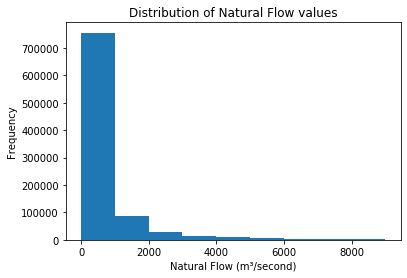

In [682]:
bin_edges = np.arange(0, 10000, 1000)
plt.hist(data = reservoirs_df_3, x = 'natural_flow_adj', bins = bin_edges)
plt.title('Distribution of Natural Flow values')
plt.xlabel('Natural Flow (m³/second)')
plt.ylabel('Frequency')
plt.show()

## Natural Water Flow - Anual Averages

Unfortunately, there was a lot of missing data from years prior to 1993. As this kind of time series has a lot of seasonality, the more data we could grab the more clear the trend line would be.

Even so, I plotted a trend line on the yearly average natural flow of water in the 101 brazilian reservoirs' time series data.

It is clear that even taking the yearly mean value, we still see a lot of seasonality on the line.

In the next plot, I will dig deeper using moving average.

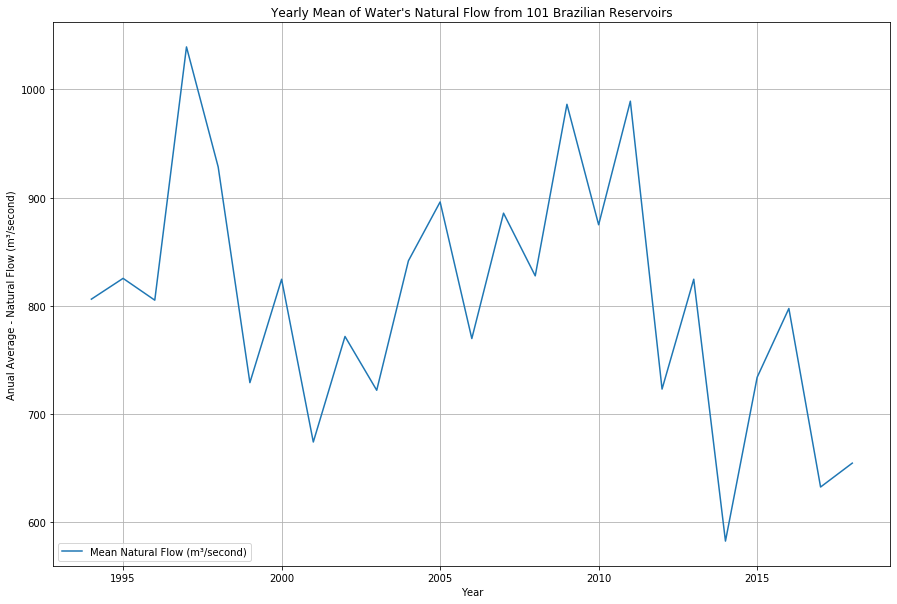

In [688]:
# Plot the mean of natural_flow_adj
mean_series = reservoirs_df_3.groupby('year_of_date').natural_flow_adj.mean()
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(mean_series, label='Mean Natural Flow (m³/second)');
plt.title('Yearly Mean of Water\'s Natural Flow from 101 Brazilian Reservoirs')
plt.xlabel('Year')
plt.ylabel('Anual Average - Natural Flow (m³/second)')
plt.legend(loc=3);

## Natural Water Flow - Daily Total and Cumulative Moving Average

In order to make a smoother trend line of the total water flow on the 101 Brazilian reservoirs, I created a daily total of water flow and a cumulative moving average (CMA) for each day. Both lines are shown on the plot below.

The CMA trend line suggest a slight decrease on the total water flow on our 101 reservoirs' observations.

Next I plotted only the CMA to see it in a smaller scale.

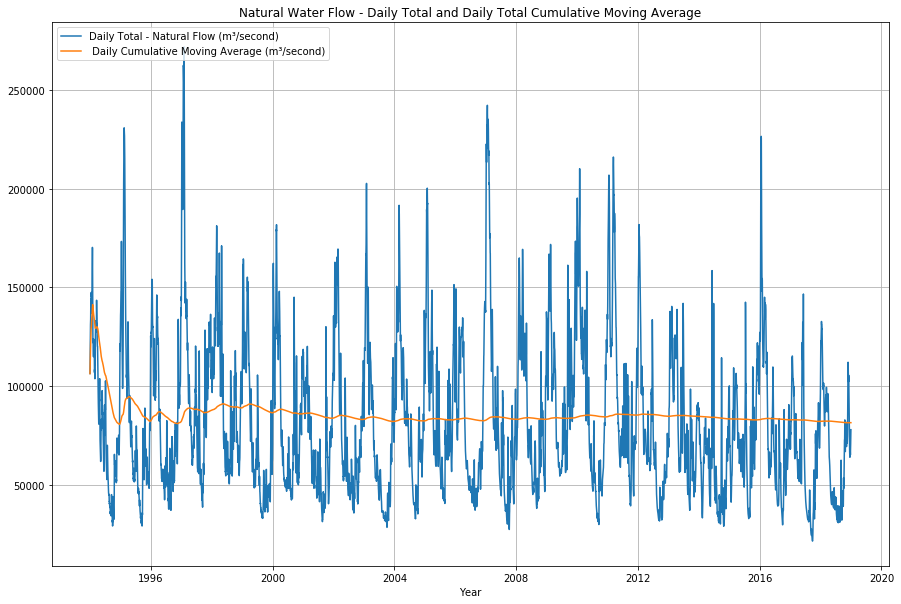

In [692]:
daily_nat_flow_df.index = daily_nat_flow_df.measurement_date
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(daily_nat_flow_df['total_natural_flow'], label='Daily Total - Natural Flow (m³/second)');
plt.plot(daily_nat_flow_df['cma'], label=' Daily Cumulative Moving Average (m³/second)');
plt.title('Natural Water Flow - Daily Total and Daily Total Cumulative Moving Average')
plt.xlabel('Year')
plt.legend(loc=2);

## Natural Water Flow - Cumulative Moving Average

The trend line shows a tendency of shorten total natural water flow, from 90.000 m³/second to 80.000 m³/second.

This is just a starting point for my investigation. I will dig deeper into a more resourceful data base and try to get a wider time frame that contemplates all brazilian reservoirs.

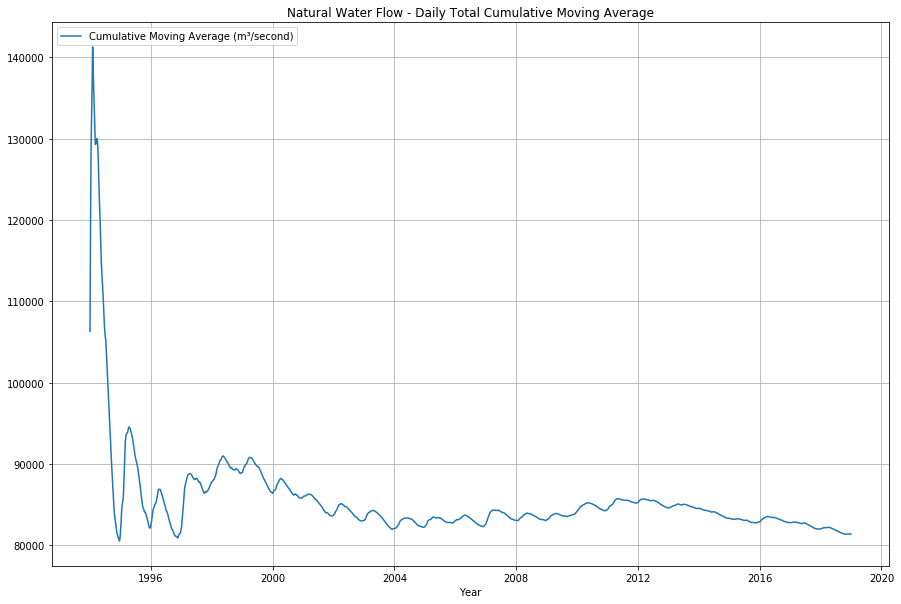

In [693]:
daily_nat_flow_df.index = daily_nat_flow_df.measurement_date
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(daily_nat_flow_df['cma'], label='Cumulative Moving Average (m³/second)');
plt.title('Natural Water Flow - Daily Total Cumulative Moving Average')
plt.xlabel('Year')
plt.legend(loc=2);